# Computação Quântica
## Aula 5

### Realizando teleportação de um qubit com valor 

In [15]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
import qiskit.quantum_info as qi
from scipy import linalg as lng
import matplotlib.pyplot as plt

In [16]:
# Definindo o circuito
qr = QuantumRegister(3) # criando um registro quântico para cada um dos qubits
crz, crx = ClassicalRegister(1), ClassicalRegister(1)  # criando registros clássicos para cada um dos bits clássicos
circuit = QuantumCircuit(qr, crz, crx) # definição do circuito quântico, mas usando os registradores em vez do número de qubits que serão usados 

In [17]:
circuit.rx(np.pi/5,0) # aplicando a operação lógica X no circuito girando o qubit para que ele tenha um valor para ser teletransportado 
# estado inicial do qubit


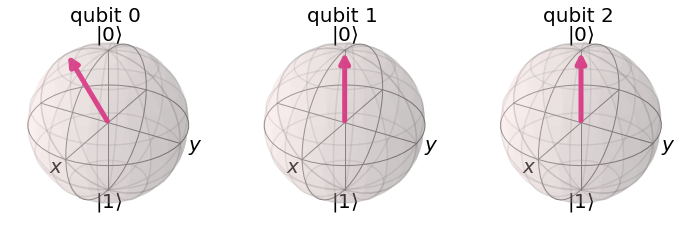

In [18]:
svsim = Aer.get_backend('statevector_simulator')
result = execute(circuit, shots=20000, backend= svsim).result()
svector = result.get_statevector()
plot_bloch_multivector(svector)
# podemos ver os 3 qubits que serão usados no circuito e que o primeiro qubit possui um valor inicial diferenciado 


Teletransporte:  
- a pessoa_1 possui o qubit_0 com uma informação
- cria um emaranhamento entre qubit_1 e qubit_2
- envia o qubit_2 para a pessoa_2 criando um canal de comunicação
- a pessoa_1 faz emaranha o qubit_0 e o qubit_1 
- assim a pessoa_2 recebe as alterações feitas no qubit_0 no qubit_2 através do qubit_1

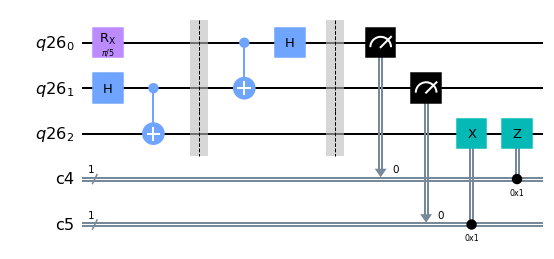

In [19]:
# Algoritmo de teletransporte
circuit.h(1)  # aplicando hadammart no qubit 1
circuit.cx(1,2)  # aplicando control_not entre os qubits 1 e 2 
# foi realizado o emaranhamento entre os qubits 1 e 2 
circuit.barrier()
# nesse momento a pessoa_1 manda o qubit 2 para a pessoa_2


circuit.cx(0,1) # aplicando control_not entre os qubits 0 e 1 
circuit.h(0)  # aplicando hadammart no qubit 0
circuit.barrier()


circuit.measure(0,crz) # mede o valor do qubit e salva em um registro clássico 
circuit.measure(1,crx)
# dependendo do resultado medido a pessoa_2 precisa fazer ajustes na sua medição recebida pelo canal de comunicação 


circuit.x(2).c_if(crx,1) #aplica X se registrador clássico crx registra valor = 1 
circuit.z(2).c_if(crz,1) #aplica Z se registrador crz for = 1 

circuit.draw(output='mpl')

In [20]:
# Executando o circuito 
result = execute(circuit, shots=20000, backend= svsim).result()
svector = result.get_statevector()
print(svector)

Statevector([ 9.51056516e-01+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00-0.j        ,  0.00000000e+00+0.j        ,
             -3.78436673e-17-0.30901699j,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
            dims=(2, 2, 2))


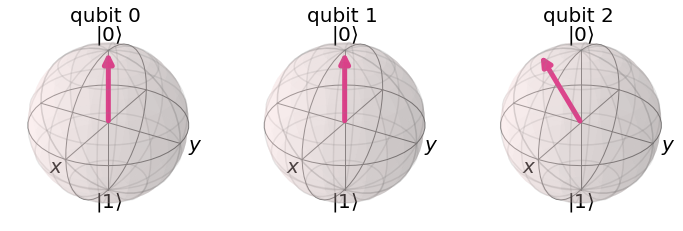

In [21]:
plot_bloch_multivector(svector)